# CIFAR-10 Dataset

Unlike MNIST or Fashion MNIST, CIFAR-10 contains colored images which means that a simple neural network won't cut it.

So to classify this dataset, it needs a Deep Learning algorithm known as a Convolutional Neural Network which will be built using TensorFlow 2 and Keras.

In [1]:
# IMPORT PACKAGES

import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# GET THE DATASET

cifar10 = tf.keras.datasets.cifar10

# Split data into training and testing sets
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

print("Training examples: " + str(len(train_labels)))
print("Testing examples: " + str(len(test_labels)))

Training examples: 50000
Testing examples: 10000


In [3]:
# Check the shape of the data i.e. (num_examples, x, y, z)

print("Shape of Training images: " + str(train_images.shape))
print("Shape of Training labels: " + str(train_labels.shape))
print("Shape of Testing images: " + str(test_images.shape))
print("Shape of Testing labels: " + str(test_labels.shape))

Shape of Training images: (50000, 32, 32, 3)
Shape of Training labels: (50000, 1)
Shape of Testing images: (10000, 32, 32, 3)
Shape of Testing labels: (10000, 1)


In [4]:
# Create a validation/dev set
# Note: Validation/Dev set MUST always come from the same data distrubtion as the test set.
 
split_data = int(len(test_labels) / 2)

validation_images = test_images[:split_data]
validation_labels = test_labels[:split_data]

# Now we create a new test set

test_images = test_images[split_data:]
test_labels = test_labels[split_data:]

print("Validation examples: " + str(len(validation_labels)))
print("Testing (New) examples: " + str(len(test_labels)))

Validation examples: 5000
Testing (New) examples: 5000


In [5]:
# Convolutional Neural Network

model = tf.keras.models.Sequential([
    # CONV => RELU => CONV => RELU => POOL => DROPOUT
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.5),

    # CONV => RELU => CONV => RELU => POOL => DROPOUT
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(0.5),

    # FLATTEN => DENSE => RELU => DENSE => RELU => DROPOUT
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),

    # OUTPUT (SOFTMAX)
    tf.keras.layers.Dense(10, activation='softmax')
])


model.summary()

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['acc'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 64)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0

In [6]:
# Train the model
EPOCHS = 100
BATCH_SIZE = 16

history = model.fit(train_images, train_labels, epochs=EPOCHS, validation_data=(validation_images, validation_labels),verbose=1)

Epoch 1/100
1563/1563 [==============================] - 18s 11ms/step - loss: 1.6418 - acc: 0.3919 - val_loss: 1.3296 - val_acc: 0.5256
Epoch 2/100
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2839 - acc: 0.5381 - val_loss: 1.1387 - val_acc: 0.5948
Epoch 3/100
1563/1563 [==============================] - 18s 12ms/step - loss: 1.1242 - acc: 0.6032 - val_loss: 0.9589 - val_acc: 0.6632
Epoch 4/100
1563/1563 [==============================] - 20s 13ms/step - loss: 1.0228 - acc: 0.6427 - val_loss: 0.9201 - val_acc: 0.6738
Epoch 5/100
1563/1563 [==============================] - 21s 13ms/step - loss: 0.9540 - acc: 0.6673 - val_loss: 0.8374 - val_acc: 0.7070
Epoch 6/100
1563/1563 [==============================] - 21s 14ms/step - loss: 0.8979 - acc: 0.6845 - val_loss: 0.8013 - val_acc: 0.7268
Epoch 7/100
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8520 - acc: 0.6989 - val_loss: 0.7846 - val_acc: 0.7268
Epoch 8/100
1563/1563 [==================

<Figure size 432x288 with 0 Axes>

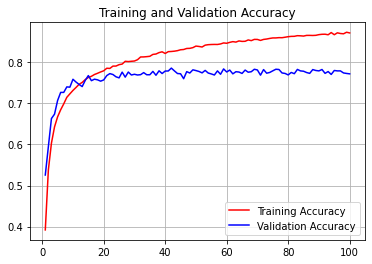

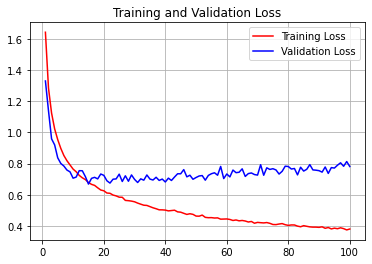

<Figure size 432x288 with 0 Axes>

In [7]:
# Plot the accuracy and loss for training and validation
acc = history.history['acc']
loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

epochs = range(1, EPOCHS + 1)

# *************************************
#           ACCURACY GRAPH
# *************************************
plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.grid()
plt.legend()
plt.figure()

# *************************************
#           LOSS GRAPH
# *************************************
plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and Validation Loss')
plt.grid()
plt.legend()
plt.figure()

In [8]:
# Evaluate the model
eval = model.evaluate(test_images, test_labels, verbose=1)

print("Testing Accuracy: " + str(eval[1]))
print("Testing Loss: " + str(eval[0]))

157/157 [==============================] - 1s 4ms/step - loss: 0.8086 - acc: 0.7680
Testing Accuracy: 0.7680000066757202
Testing Loss: 0.8086496591567993
